# Setup

In [1]:
%pip install scikit-learn
%pip install matplotlib

You should consider upgrading via the '/home/letung3105/.pyenv/versions/3.8.6/envs/MIP/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/letung3105/.pyenv/versions/3.8.6/envs/MIP/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import math
from enum import Enum

import matplotlib.pyplot as plt
import numpy as np

# Task 01

We create 2 funtions to facilitate the algorithm for constructing the images.
+ `distance2d` calculates the distance between 2 points on a plane using the specified metric
+ `equidistance_countour_image` creates an image, then set the pixels of that image to be "on" based on the distance that is calculated by `distance2d`

In [3]:
class DistanceMetric(Enum):
    EUCLIDEAN = 0
    TCHEBYCHEV = 1
    TAXICAB = 2
    
    
def distance2d(distance_metric, point_x, point_y):
    if distance_metric == DistanceMetric.EUCLIDEAN:
        return math.hypot(
            math.fabs(point_x[0] - point_y[0]),
            math.fabs(point_x[1] - point_y[1]),
        )
    elif distance_metric == DistanceMetric.TCHEBYCHEV:
        return max(
            math.fabs(point_x[0] - point_y[0]),
            math.fabs(point_x[1] - point_y[1]),
        )
    elif distance_metric == DistanceMetric.TAXICAB:
        return (
            math.fabs(point_x[0] - point_y[0]) +
            math.fabs(point_x[1] - point_y[1])
        )
    else:
        raise RuntimeError("Metric not supported")
        
        
def equidistance_countour_image(distance_metric, dimensions, origin, radius):
    image = np.zeros(shape = dimensions).T
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Use rounding
            d = round(distance2d(distance_metric, origin, (y, x)))
            if d == radius:
                image[y,x] = 1

    return image

We now generate images using the above mentioned functions with different distance metrics. The distances that we use are 1, 2, 3, and 5.

First we generated the images using the Euclidean metric. From the the generated images, we can see that the countour only divides the plane into 2 non-contigous regions when we use a distance of 1 and consider the background to be of 8-connectivity.

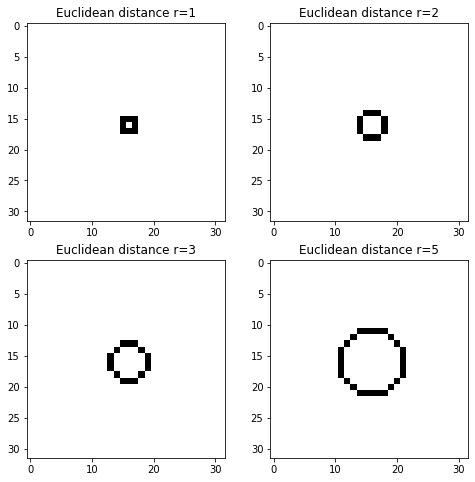

In [4]:
radii = [1, 2, 3, 5]
fig, axs = plt.subplots(len(radii)//2 + len(radii) % 2, 2, figsize=(8, 8))

for (idx, radius) in enumerate(radii):
    image = equidistance_countour_image(
        distance_metric=DistanceMetric.EUCLIDEAN,
        dimensions=(32, 32),
        origin=(16, 16),
        radius=radius
    )

    axs[idx//2,idx % 2].set_title("Euclidean distance r=%d" % (radius))
    axs[idx//2,idx % 2].imshow(image, cmap=plt.cm.binary)
    
plt.show()

Similarly, we generated the images using the Tchebychev metric. With this metric, the countour will always divide the plane into 2 non-contiguous regions when we consider the background to be of 8-connectivity.

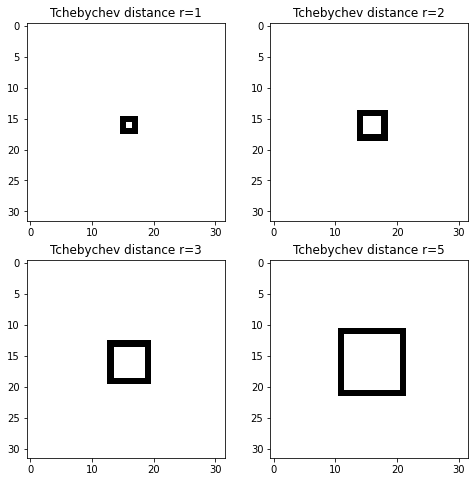

In [5]:
radii = [1, 2, 3, 5]
fig, axs = plt.subplots(len(radii)//2 + len(radii) % 2, 2, figsize=(8, 8))

for (idx, radius) in enumerate(radii):
    image = equidistance_countour_image(
        distance_metric=DistanceMetric.TCHEBYCHEV,
        dimensions=(32, 32),
        origin=(16, 16),
        radius=radius
    )

    axs[idx//2,idx % 2].set_title("Tchebychev distance r=%d" % (radius))
    axs[idx//2,idx % 2].imshow(image, cmap=plt.cm.binary)

Finally, we generated the images using the Taxicab metric. With this metric, the countour never divides the plane into 2 non-contiguous regions when we consider the background to be of 8-connectivity.

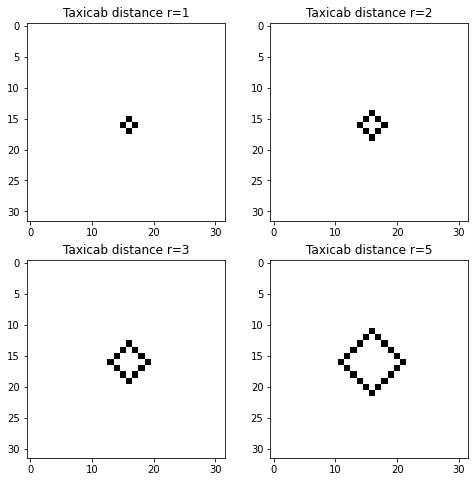

In [6]:
radii = [1, 2, 3, 5]
fig, axs = plt.subplots(len(radii)//2 + len(radii) % 2, 2, figsize=(8, 8))

for (idx, radius) in enumerate(radii):
    image = equidistance_countour_image(
        distance_metric=DistanceMetric.TAXICAB,
        dimensions=(32, 32),
        origin=(16, 16),
        radius=radius
    )

    axs[idx//2][idx % 2].set_title("Taxicab distance r=%d" % (radius))
    axs[idx//2][idx % 2].imshow(image, cmap=plt.cm.binary)

# Task 02

For each of the three distance metrics, construct an image in which the value of pixel $(i, j)$ is proportional to the corresponding distance from an arbitrary pixel $(i_o,j_o)$ the coordinates of which are requested as input. For the image constructed using Euclidean distance, define a region R such that all pixels $(i, j) \in R$ satisfy the distance condition $D[(i, j), (i_o, j_o)]<d_o$, where $d_o$ is some reasonable distance. Produce the run-length code for region $R$ (considered as a binary image).

We create a function that set the pixel based on it distance from the given point, the distance is calculated using the function `distance2d` from the task 1. The "further" away a pixel is from the given point, the lower the pixel value. Then for each distance metric, we apply the function to generate the corresponding image.

In [7]:
def gradient_bounded_region_image(distance_metric, dimensions, origin):
    image = np.zeros(dimensions).T
    max_distance = distance2d(distance_metric, (0, 0), dimensions)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            d = distance2d(distance_metric, origin, (x, y))
            pval = round(255 * (1 - d / max_distance))
            image[y,x] = pval

    return image

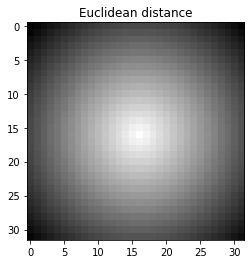

In [8]:
image = gradient_bounded_region_image(
    distance_metric=DistanceMetric.EUCLIDEAN,
    dimensions=(32, 32),
    origin=(16, 16),
)
plt.imshow(image, cmap=plt.cm.gray)
plt.title("Euclidean distance")
plt.show()

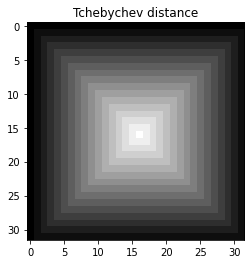

In [9]:
image = gradient_bounded_region_image(
    distance_metric=DistanceMetric.TCHEBYCHEV,
    dimensions=(32, 32),
    origin=(16, 16),
)
plt.imshow(image, cmap=plt.cm.gray)
plt.title("Tchebychev distance")
plt.show()

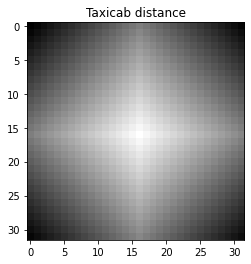

In [10]:
image = gradient_bounded_region_image(
    distance_metric=DistanceMetric.TAXICAB,
    dimensions=(32, 32),
    origin=(16, 16),
)
plt.imshow(image, cmap=plt.cm.gray)
plt.title("Taxicab distance")
plt.show()

We then define a function that constructs a binary image where all the pixels within a distance from the given point is set to "on", and generate an image using the function with the Euclidean distance metric.

In [11]:
def solid_bounded_region_image(distance_metric, dimensions, origin, radius):
    image = np.zeros(dimensions).T
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            d = distance2d(distance_metric, origin, (x, y))
            if d < radius:
                image[y,x] = 1

    return image

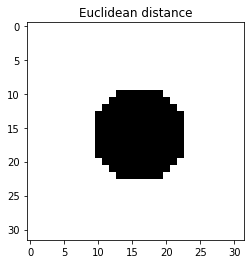

In [12]:
image = solid_bounded_region_image(
    distance_metric=DistanceMetric.EUCLIDEAN,
    dimensions=(32, 32),
    origin=(16, 16),
    radius=7,
)
plt.imshow(image, cmap=plt.cm.binary)
plt.title("Euclidean distance")
plt.show()

The run length codes can be computed from the image by going through every row in the image, and determine the contiguous region of pixels along the x-axis where the value of all the pixels is equal to the given value.

In [13]:
def run_length_code_from_image(image, pixel_value):
    codes = []
    for y in range(image.shape[0]):
        prev_x_pos = -1
        for x in range(image.shape[1]):
            if image[y,x] == pixel_value and prev_x_pos == -1:
                # First time encounter a pixel with the expected value
                prev_x_pos = x
            elif image[y,x] != pixel_value and prev_x_pos != -1:
                # Encounter an different pixel value in the contiguous region
                codes.append((y, prev_x_pos, x-1))
                prev_x_pos = -1

        if prev_x_pos != -1:
            codes.append((y, prev_x_pos, image.shape[1]-1))

    return codes

In [14]:
image = solid_bounded_region_image(
    distance_metric=DistanceMetric.EUCLIDEAN,
    dimensions=(32, 32),
    origin=(16, 16),
    radius=7,
)
run_length_code_from_image(image, 1)

[(10, 13, 19),
 (11, 12, 20),
 (12, 11, 21),
 (13, 10, 22),
 (14, 10, 22),
 (15, 10, 22),
 (16, 10, 22),
 (17, 10, 22),
 (18, 10, 22),
 (19, 10, 22),
 (20, 11, 21),
 (21, 12, 20),
 (22, 13, 19)]

# Task 3

Develop an algorithm that uses the run-length code from Problem 2 to create a binary image in which pixels in region R are "on" and other pixels are "off." Subsample this 32 x 32-pixel image to create an 8 x 8-pixel binary image, and develop an algorithm that derives the quadtree representation of this binary image.

The image is reconstructured from the run length code by going through all the triplets in the code, then use the specified pixel-coordinates in the triplets to set the pixel of the binary image to "on".

In [15]:
def image_from_run_length_code(run_length_code, dimensions):
    image = np.zeros(dimensions)
    for (y, x1, x2) in run_length_code:
        for x in range(x1, x2 + 1):
            image[y,x] = 1

    return image

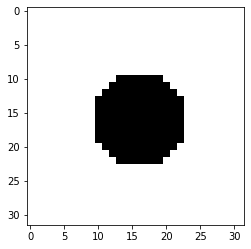

In [16]:
image = solid_bounded_region_image(
    distance_metric=DistanceMetric.EUCLIDEAN,
    dimensions=(32, 32),
    origin=(16, 16),
    radius=7,
)
run_length_code = run_length_code_from_image(image, 1)

image = image_from_run_length_code(run_length_code, dimensions=(32,32))
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

We define a function that subsample the image, by create a new image whose pixel value is the arithmetic mean of a 4-pixel grouping of the original image.

In [17]:
def subsample(image, level=1):
    if level == 0:
        return image

    sampled_dimensions = (image.shape[0]//2, image.shape[1]//2)
    sampled_image = np.zeros(sampled_dimensions)
    for y in range(0, image.shape[0], 2):
        for x in range(0, image.shape[1], 2):
            pval = (
                image[y,x]
                + image[y+1,x]
                + image[y,x+1]
                + image[y+1,x+1]
            ) // 4
            sampled_image[y//2,x//2] = pval

    return subsample(sampled_image, level - 1)

Then we subsample the image of the region twice, producing a 8x8 image from a 32x32 image.

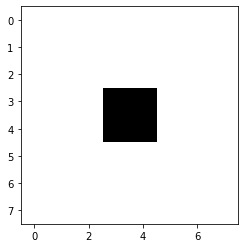

In [18]:
image = subsample(
    image=solid_bounded_region_image(
        distance_metric=DistanceMetric.EUCLIDEAN,
        dimensions=(32, 32),
        origin=(16, 16),
        radius=7,
    ),
    level=2,
)
plt.imshow(image, cmap=plt.cm.binary) 
plt.show()

We define a quad-tree for binary images. For the defined tree, the quadrants are sub-divided when all the pixels in that quadrant are not of the same value, in this case that value is 0 or 1.

In [19]:
class BinaryQuadTreeNode():
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.children = []

    def recursive_subdivide(self, image):
        if (self.is_uniform(image)):
            if image[self.y,self.x] == 1:
                return "b"
            else:
                return "w"

        node_repr = "g("
        quadrant_width = self.width // 2
        quadrant_height = self.height // 2

        x_bottom_right = self.x + quadrant_width
        y_bottom_right = self.y + quadrant_height
        quadrant_bottom_right = BinaryQuadTreeNode(
            x_bottom_right,
            y_bottom_right,
            quadrant_width,
            quadrant_height
        )
        node_repr += quadrant_bottom_right.recursive_subdivide(image)

        x_bottom_left = self.x
        y_bottom_left = self.y + quadrant_height
        quadrant_bottom_left = BinaryQuadTreeNode(
            x_bottom_left,
            y_bottom_left,
            quadrant_width,
            quadrant_height
        )
        node_repr += quadrant_bottom_left.recursive_subdivide(image)

        x_top_right = self.x + quadrant_width
        y_top_right = self.y
        quadrant_top_right = BinaryQuadTreeNode(
            x_top_right,
            y_top_right,
            quadrant_width,
            quadrant_height
        )
        node_repr += quadrant_top_right.recursive_subdivide(image)

        x_top_left = self.x
        y_top_left = self.y
        quadrant_top_left = BinaryQuadTreeNode(
            x_top_left,
            y_top_left,
            quadrant_width,
            quadrant_height
        )
        node_repr += quadrant_top_left.recursive_subdivide(image)

        node_repr += ")"
        self.children = [
            quadrant_top_left,
            quadrant_top_right,
            quadrant_bottom_left,
            quadrant_bottom_right,
        ]
        return node_repr

    def is_uniform(self, image):
        pixel_value_set = set()
        for yy in range(self.y, self.y + self.height):
            for xx in range(self.x, self.x + self.width):
                pixel_value_set.add(image[yy,xx])
                if len(pixel_value_set) > 1:
                    return False

        return True


class BinaryQuadTree():
    def __init__(self, image):
        self.root = BinaryQuadTreeNode(
            0, 0,
            image.shape[1],
            image.shape[0]
        )
        self.repr = self.root.recursive_subdivide(image)

    def __repr__(self):
        return self.repr

Constructing the tree and show it encoded representation using the subsampled image in the section above

g(g(wwwg(wwwb))g(wwg(wwbw)w)g(wg(wbww)ww)g(g(bwww)www))


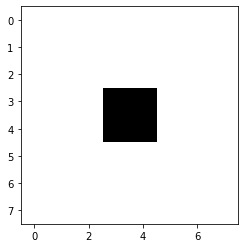

In [20]:
sampled_image = subsample(
    image=solid_bounded_region_image(
        distance_metric=DistanceMetric.EUCLIDEAN,
        dimensions=(32, 32),
        origin=(16, 16),
        radius=7,
    ),
    level=2,
)

print(BinaryQuadTree(sampled_image))
plt.imshow(sampled_image, cmap=plt.cm.binary)

# Task 4

Write a program that outputs the base-2 representation of any non-negative base- 10 integer provided as input.

In [21]:
def decimal_to_binary(n):
    binary = ''
    while (n != 0):
        binary = str(n % 2) + binary
        n = n // 2
    return binary

In [22]:
# decimal_to_binary(10)
print(f"{10:b}")

1010
